In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download CSV file

In [2]:
df = pd.read_csv('coursework_fintech.csv', parse_dates=['Date'], index_col=['Date'],  dayfirst=True)

In [3]:
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df

,Open,High,Low,Close,Adj Close,Day,Month,Year
Date,,,,,,,,
1995-01-03,0.347098,0.347098,0.338170,0.342634,0.290447,3,1,1995
1995-01-04,0.344866,0.353795,0.344866,0.351563,0.298016,4,1,1995
1995-01-05,0.350446,0.351563,0.345982,0.347098,0.294231,5,1,1995
1995-01-06,0.371652,0.385045,0.367188,0.375000,0.317883,6,1,1995
1995-01-09,0.371652,0.373884,0.366071,0.367885,0.311852,9,1,1995
...,...,...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,27,12,2021
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,28,12,2021
2021-12-29,179.330002,180.630005,178.139999,179.380005,179.380005,29,12,2021


Print the shape of Dataframe  and Check for Null Values

In [4]:
print("Dataframe Shape:", df.shape)
print("Any NaN Values Present?", df.isnull().values.any())

Dataframe Shape: (6799, 8)
Any NaN Values Present? False


# Plot APPL stock price data

Text(0.5, 1.0, 'Daily Apple Inc. Stock Price')

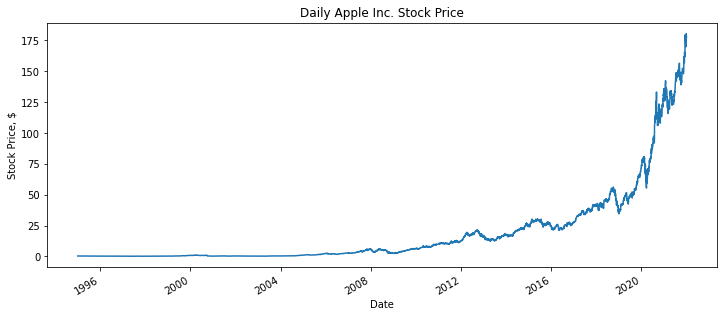

In [5]:
ts = df['Adj Close'].plot(figsize=[12,5])
plt.xlabel('Date')
plt.ylabel('Stock Price, $')
plt.title('Daily Apple Inc. Stock Price')

Text(0.5, 1.0, 'Daily Apple Inc. Stock Price')

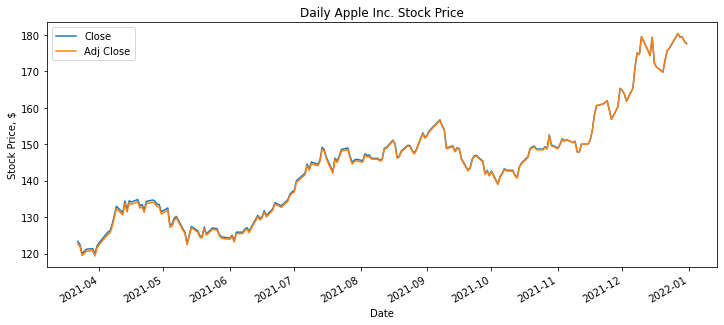

In [6]:
ts = df[['Close','Adj Close']][6600:].plot(figsize=[12,5])
plt.xlabel('Date')
plt.ylabel('Stock Price, $')
plt.title('Daily Apple Inc. Stock Price')

# Setting target variable as the adjusted close price and the feature selection

In [7]:
#Set Target Variable
Y = pd.DataFrame(df["Adj Close"])

#Selecting the Features
features = ["Day", "Month", "Year", "Open", "High", "Low", "Close"]
X = pd.DataFrame(df[features])

print(X.shape)
print(Y.shape)

(6799, 7)
(6799, 1)


# Split into a train and test set

In [8]:
from sklearn.model_selection import train_test_split

Y = np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, shuffle=False ,random_state=42)

print("The size of the train set is:", X_train.size, " and the size of the test set is:", X_test.size)
print("The ratio is", round(X_train.size/(X_test.size+X_train.size), 4))

The size of the train set is: 42833  and the size of the test set is: 4760
The ratio is 0.9


# Baseline model performance
### Using the Close value as the Adjusted Close value for that day. 

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


Close_test = pd.DataFrame(X_test['Close'])
BL_r2 = r2_score(y_test, Close_test)
BL_RMSE = sqrt(mean_squared_error(y_test, Close_test))
BL_MAE = sqrt(mean_absolute_error(y_test, Close_test))

print('BASELINE MODEL:')
print('Using the Close value of that day as the Adjusted Close value prediction')
print('    - The R^2 score on test dataset = ',BL_r2)
print('    - RMSE on test dataset = ', BL_RMSE)
print('    - MAE on test dataset = ', BL_MAE)

BASELINE MODEL:
Using the Close value of that day as the Adjusted Close value prediction
    - The R^2 score on test dataset =  0.9995465381105814
    - RMSE on test dataset =  0.8035274621045462
    - MAE on test dataset =  0.85663417272623


# Ridge regression

## Grid search for best parameters for Ridge model

In [10]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


Pipeline

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(max_iter=100000, tol=0.001))
])

In [12]:
search = GridSearchCV(pipeline,
                     {'model__alpha':np.linspace(0.002,0.005,20)},
                     cv=4,
                     scoring = 'neg_root_mean_squared_error',
                     verbose=0
                     
                     )

In [13]:
# import warnings
# warnings.filterwarnings('ignore')

search.fit(X_train, y_train)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(max_iter=100000))]),
             param_grid={'model__alpha': array([0.002     , 0.00215789, 0.00231579, 0.00247368, 0.00263158,
       0.00278947, 0.00294737, 0.00310526, 0.00326316, 0.00342105,
       0.00357895, 0.00373684, 0.00389474, 0.00405263, 0.00421053,
       0.00436842, 0.00452632, 0.00468421, 0.00484211, 0.005     ])},
             scoring='neg_root_mean_squared_error')

In [14]:
print(search.best_params_)
coef = search.best_estimator_[1].coef_
print(coef)
print("Features included in the Lasso model:", np.array(features)[coef != 0])
print("Features discarded from the Lasso model:", np.array(features)[coef == 0])

{'model__alpha': 0.005}
[-2.41085064e-03 -3.42805697e-02 -6.24916655e-01 -3.06145130e+00
  2.77992432e+00  1.82008146e+00  1.21381841e+01]
Features included in the Lasso model: ['Day' 'Month' 'Year' 'Open' 'High' 'Low' 'Close']
Features discarded from the Lasso model: []


In [15]:
pred_train = search.best_estimator_.predict(X_train)
pred_test = search.best_estimator_.predict(X_test)

print('Ridge Regression model:')
print("Train:")
print('    - R^2 score = ',r2_score(y_true= y_train, y_pred= pred_train))
print('    - RMSE = ', sqrt(mean_squared_error(y_true= y_train, y_pred= pred_train)))
print('    - MAE = ', sqrt(mean_absolute_error(y_true= y_train, y_pred= pred_train)))
print("Test:")
print('    - R^2 score = ',r2_score(y_true= y_test, y_pred= pred_test))
print('    - RMSE = ', sqrt(mean_squared_error(y_true= y_test, y_pred= pred_test)))
print('    - MAE = ', sqrt(mean_absolute_error(y_true= y_test, y_pred= pred_test)))

Ridge Regression model:
Train:
    - R^2 score =  0.9985841413249849
    - RMSE =  0.49478609626767367
    - MAE =  0.6135777204118708
Test:
    - R^2 score =  0.9939710622884429
    - RMSE =  2.929886023563268
    - MAE =  1.664706878225074
